<img src="images/keepcoding.png" width=200 align="left">

# Módulo de álgebra: práctica

Vamos a poner de nuevo en práctica lo que hemos visto en este módulo. La práctica consta de cuatro bloques, y podéis preguntarme las dudas que tengáis por Discord. ¡Mucha suerte!

<img src="./images/luck.gif" alt="Drawing" style="width: 300px;"/>

## 1. Powersets

El [powerset](https://en.wikipedia.org/wiki/Power_set) o conjunto de partes de un conjunto es otro conjunto que contiene todos los posibles subconjuntos. Por ejemplo, en el conjunto {'perro', 'gato', 'conejo'} tendremos los siguientes subconjuntos:

{} 
{'perro'}
{'perro', 'gato'}
{'perro', 'gato', 'conejo'}
{'perro', 'conejo'}
{'gato'}
{'gato', 'conejo'}
{'conejo'}

El conjunto vacío y el conjunto inicial forman siempre parte del powerset de un conjunto C. El cardinal del powerset es $2^n$, siendo n el número de elementos del conjunto.

Vamos a implementar el powerset con Python.

### 1.1 Implementación iterativa

Implementa una función para obtener el powerset de un conjunto dado de forma iterativa. También se puede hacer de forma recursiva, porque el powerset de {1, 2, 3} contiene al de {1, 2}.

In [3]:
def powerset(A):
    # TODO Define la funcion
    # Inicia con el conjunto vacío
    power_set = {frozenset()}    
    # Itera sobre cada elemento en el conjunto original
    for element in A:
        # Agrega el elemento a cada subconjunto existente
        new_subsets = {subset.union({element}) for subset in power_set}
        power_set = power_set.union(new_subsets)
    return power_set

def powerset_recursivo(A):
    if len(A) == 0:
        return {frozenset()}
    # Remueve un elemento del conjunto
    element = A.pop()   
    # Obtén el powerset del conjunto reducido
    subsets = powerset_recursivo(A)
    # Agrega el elemento removido a cada subconjunto
    new_subsets = {subset.union({element}) for subset in subsets}   
    return subsets.union(new_subsets)


print(powerset({1,2,3}))
print(powerset({'coche','bici','avion', 'moto'}))

print(powerset_recursivo({1,2,3}))
print(powerset_recursivo({'coche','bici','avion', 'moto'}))

{frozenset({2}), frozenset({2, 3}), frozenset({1, 2}), frozenset({1, 2, 3}), frozenset({3}), frozenset({1}), frozenset(), frozenset({1, 3})}
{frozenset({'avion'}), frozenset({'bici', 'avion'}), frozenset({'moto'}), frozenset({'coche'}), frozenset({'bici', 'moto', 'coche'}), frozenset({'bici', 'moto', 'avion'}), frozenset({'bici', 'avion', 'coche'}), frozenset({'moto', 'avion', 'coche'}), frozenset({'bici', 'moto'}), frozenset({'bici', 'coche'}), frozenset({'moto', 'coche'}), frozenset({'moto', 'avion'}), frozenset({'avion', 'coche'}), frozenset({'bici'}), frozenset(), frozenset({'bici', 'moto', 'avion', 'coche'})}
{frozenset({2}), frozenset({2, 3}), frozenset({1, 2, 3}), frozenset({1, 2}), frozenset({3}), frozenset({1}), frozenset(), frozenset({1, 3})}
{frozenset({'avion'}), frozenset({'bici', 'avion'}), frozenset({'coche'}), frozenset({'moto'}), frozenset({'bici', 'moto', 'coche'}), frozenset({'bici', 'avion', 'coche'}), frozenset({'bici', 'moto', 'avion'}), frozenset({'moto', 'avion'

### 1.2 OPCIONAL Implementación usando itertools

Implementa una función para obtener el powerset de un conjunto dado usando la librería `itertools`. En este caso, podemos dejar el resultado como tuplas, en lugar de sets.

https://docs.python.org/3/library/itertools.html

In [7]:
import itertools as it

def powerset_it(A):
    #Genera el powerset de un conjunto dado A usando itertools.

   #:param A: Un conjunto de elementos
    #:return: Un conjunto que contiene todos los subconjuntos de A como tuplas, incluyendo la tupla vacía y el propio A.
    power_set = set()
    for r in range(len(A) + 1):
        for subset in it.combinations(A, r):
            power_set.add(subset)

    return power_set

for elemento in powerset_it({1,2,3}):
    print(elemento)



(1, 3)
(1, 2)
(2,)
(1, 2, 3)
(2, 3)
(1,)
()
(3,)


## 2. SVD para comprimir una imagen

El algoritmo de Singular Value Decomposition, del que ya hemos hablado en el módulo, nos puede servir para comprimir una imagen. Vamos a implementar varias funciones para esto. Como repaso, el algoritmo nos devuelve la descomposición de una matriz en tres matrices, una de ellas con los elementos principales y las otras dos con los vectores principales.

Usaremos:

- Una imagen de `scipy.misc`
- La implementación del algoritmo en `np.linalg`
- El error SEE (sum of squared estimate of errors)


Definición:

$$SSE =  \sum_{i=1}^{n}  (x_{i} -  \widehat{x}_i ) ^2 $$

Donde:

- $x_i$ son los valores de la matriz original X
- $\widehat{x}_i$ son los valores de la matriz reconstruida $\widehat{X}$

Lo primero, vemos la imagen que vamos a comprimir:

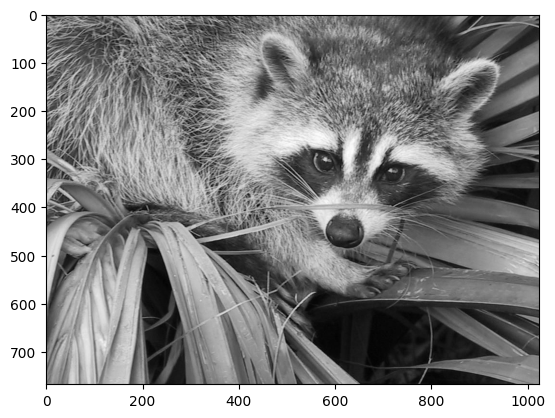

In [1]:
import matplotlib.pyplot as plt
from scipy.datasets import face
%matplotlib inline

# Load image
A = face(gray=True)

plt.imshow(A, cmap=plt.cm.gray) 

Las siguientes funciones te ayudarán a llegar a la solución final:

### 2.1 Implementa la función para el SEE
La función debe tener como entrada las dos matrices y como salida un número que será el error cometido.

In [2]:
import numpy as np

def sse_score(X, X_hat):
    # Calcula la Suma de Errores Estimados al Cuadrado (SEE) entre dos matrices.
    # :param original_matrix: La matriz original.
    #:param approx_matrix: La matriz aproximada después de aplicar alguna operación (por ejemplo, SVD).
    #:return: Un número que representa la suma de las diferencias al cuadrado entre las dos matrices.

    # Calcula la matriz de diferencias
    difference_matrix = X - X_hat

    # Cuadra las diferencias y las suma
    squared_error = np.square(difference_matrix)
    sum_squared_error = np.sum(squared_error)

    return sum_squared_error

X = np.array([[1, 2], [3, 4]])
X_hat = np.array([[1.01, 1.75], [2.81, 3.99]])
sse = sse_score(X, X_hat)  
print(sse)


0.09879999999999997


### 2.2 Implementa una función para ejecutar SVD
La función debe tener como entrada una matriz y como salida las tres matrices de la descomposición.

In [7]:
def svm(X):
    # Aplica la Descomposición en Valores Singulares (SVD) a una matriz dada.
    # :param matrix: Una matriz para descomponer.
    # :return: Tres matrices U, S y Vt de la descomposición SVD.

    U, singular_values, Vt = np.linalg.svd(X)

    # Convierte los valores singulares en una matriz diagonal para S
    S = np.zeros(X.shape)
    min_dim = min(X.shape)
    S[:min_dim, :min_dim] = np.diag(singular_values)

    return U, S, Vt

X = np.array([[1, 2], [3, 4]])
U, S, Vt = svm(X)  
print("U:", U)
print("S:", S)
print("V:", Vt)


U: [[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
S: [[5.4649857  0.        ]
 [0.         0.36596619]]
V: [[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### 2.3 Implementa una función para reconstruir la imagen

Esta función deberá reconstruir la imagen a partir de un set de matrizes (U, S, Vt) dado.

In [8]:
def reconstruction(U, S, Vt):
    # Reconstruye una matriz (imagen) a partir de los componentes de SVD dados U, S y Vt.
    #:param U: Matriz U de la SVD.
    #:param S: Matriz S de la SVD (matriz diagonal de valores singulares).
    #:param Vt: Transpuesta de la matriz V de la SVD.
    # :return: Matriz reconstruida.
    return np.dot(U, np.dot(S, Vt))

U = np.array([[-0.40455358, -0.9145143 ],
              [-0.9145143 ,  0.40455358]])
S = np.array([[5.4649857 , 0.        ],
              [0.        , 0.36596619]])
Vt = np.array([[-0.57604844, -0.81741556],
               [ 0.81741556, -0.57604844]])
X_hat = reconstruction(U, S, Vt)
X_hat

array([[0.99999999, 1.99999998],
       [3.00000003, 4.00000001]])

En este punto, ya puedes ver cuál es el error cometido si se reconstruye la matriz inicial directamente después de aplicar SVD.

In [9]:
sse = sse_score(X, X_hat)
print(f"El error de reconstrucción es: {sse}")

El error de reconstrucción es: 1.4715304986234458e-15


### 2.4 Implementa la compresión

Esta es la parte más complicada. A la función le tendremos que pasar la imagen, en forma matricial, y el número de componentes que queremos usar para la compresión.

La función aplicará SVD y reconstruirá la matriz usando solo los n_comp primeros valores propios de la descomposición. 

In [19]:
def image_compression(A, n_comp):
    # Aplicar SVD
    U, S, Vt = np.linalg.svd(A, full_matrices=False)
    
    # Mantener solo los primeros 'n_comp' componentes
    U_reduced = U[:, :n_comp]
    S_reduced = np.diag(S[:n_comp])
    Vt_reduced = Vt[:n_comp, :]
       
    # Reconstruir usando solo el número de componentes n_comp
    A_hat = reconstruction(U_reduced, S_reduced, Vt_reduced)
    
    # Calcular el error
    sse = sse_score(A, A_hat)

    return A_hat, sse

racoon = face(gray=True)
racoon_hat, sse = image_compression(racoon, n_comp=50)


### 2.5 Gráficas del resultado

Por último, se pide que pruebes para varios valores del número de componentes y grafiques la imagen original junto con varias compresiones. Puedes usar un grid 2x2 de `matplotlib`.

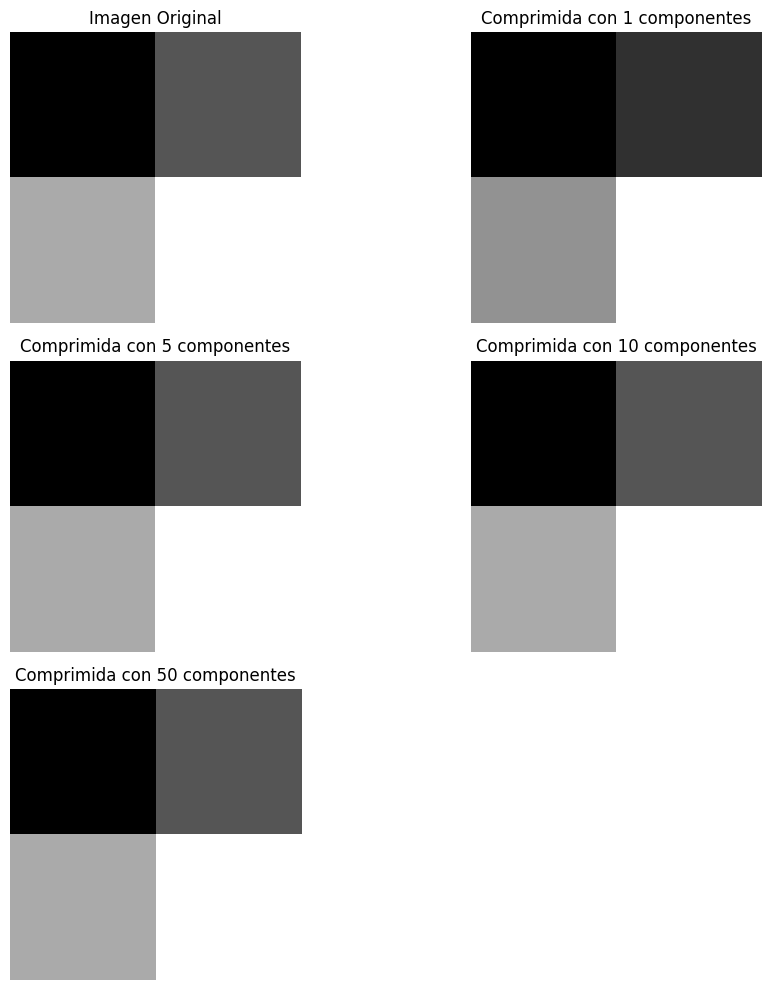

In [22]:
import matplotlib.pyplot as plt

def plot_compressed_images(A, n_components_list):
    # Plotea la imagen original y sus versiones comprimidas para diferentes números de componentes.
    # :param A: La matriz de la imagen original.
    # :param n_components_list: Lista de números de componentes para usar en la compresión.
    
    n = len(n_components_list) + 1  # número total de imágenes (incluyendo la original)
    cols = 2  # columnas en el grid
    rows = n // cols + n % cols  # filas en el grid

    plt.figure(figsize=(10, 10))

    # Plotea la imagen original
    plt.subplot(rows, cols, 1)
    plt.imshow(A, cmap='gray')
    plt.title("Imagen Original")
    plt.axis('off')

    # Plotea las imágenes comprimidas
    for i, n_comp in enumerate(n_components_list, start=2):
        compressed_image, _ = image_compression(A, n_comp)
        plt.subplot(rows, cols, i)
        plt.imshow(compressed_image, cmap='gray')
        plt.title(f"Comprimida con {n_comp} componentes")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Uso de ejemplo
# Probando diferentes números de componentes para la compresión
n_components_to_try = [1, 5, 10, 50]
plot_compressed_images(X, n_components_to_try)



## 3. Regresión lineal con mínimos cuadrados

En este ejercicio vamos a implementar la forma matricial de la regresión lineal con el método de los mínimos cuadrados. Para ello, tendrás que:

- Explorar un dataset
- Implementar la regresión lineal
- Aplicarla a los datos

Como recordatorio, los valores de los pesos $\widehat{w}$ vienen dados por:

<center>$\widehat{w} = (X^T X)^{-1}X^T y,$</center>

Donde y es la variable a predecir y X la matriz de features (NOTA: revisa cómo se define en los apuntes). Sabemos que los pesos van a ser los parámetros de la ecuación lineal que estamos intentando ajustar y tendremos uno por cada variable de entrada que usemos y además un término independiente o bias.

### 3.1 Carga del dataset y exploración de datos

Vamos a usar el dataset de [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) que podemos encontrar en el [repositorio de Machine learning de UC Irvine](https://archive.ics.uci.edu/). Lo primero, vamos a familiarizarnos con los datos.

En el propio repositorio nos indican cómo descargar el dataset con su librería (podemos consultar el código fuente si queremos).

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# metadata 
print(auto_mpg.metadata) 
  
# variable information 
print(auto_mpg.variables) 


{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

Con la función `head` de Pandas podemos ver las primeras filas del dataset.

In [3]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [4]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


Crea una función a la que le pases los dataframes de features y de target y el nombre de la variable y haga la gráfica del target (consumo en galones por milla) vs la variable que le ha llegado por parámetro. Puedes ver un ejemplo de gráfica más abajo.

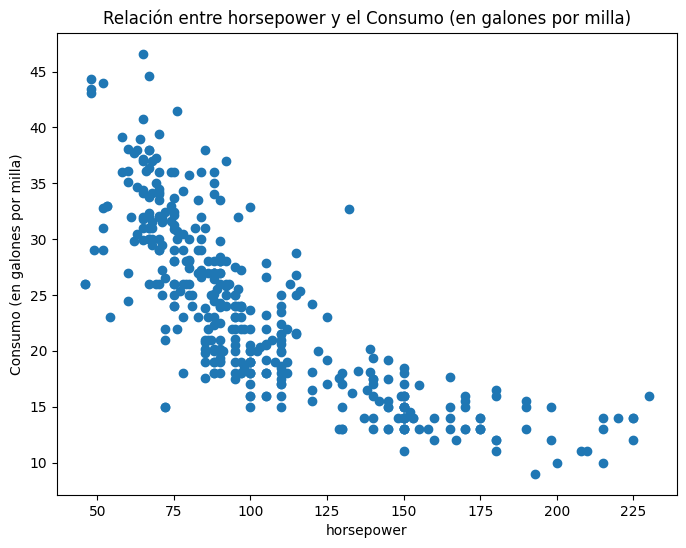

In [5]:
import matplotlib.pyplot as plt

def visualiza(df, y, nombre_columna):
    # Verificar si la característica existe
    if nombre_columna not in df.columns:
        raise ValueError(f"La característica '{nombre_columna}' no se encuentra en el DataFrame de características")

    # Verificar que solo hay una columna en el DataFrame del objetivo
    if len(y.columns) != 1:
        raise ValueError("El DataFrame del objetivo debe tener exactamente una columna")

    # Extraer la columna del objetivo
    target = y.iloc[:, 0]

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    plt.scatter(df[nombre_columna], target)
    plt.title(f"Relación entre {nombre_columna} y el Consumo (en galones por milla)")
    plt.xlabel(nombre_columna)
    plt.ylabel('Consumo (en galones por milla)')
    plt.show()
 

visualiza(X, y, 'horsepower')

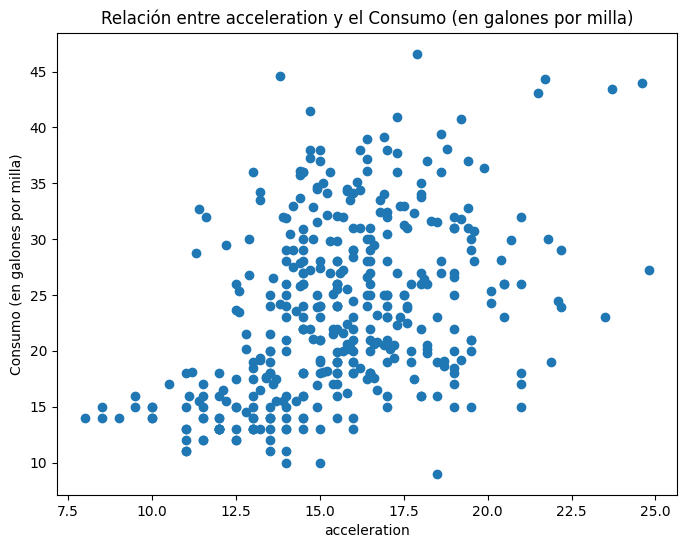

In [6]:
visualiza(X, y, 'acceleration')

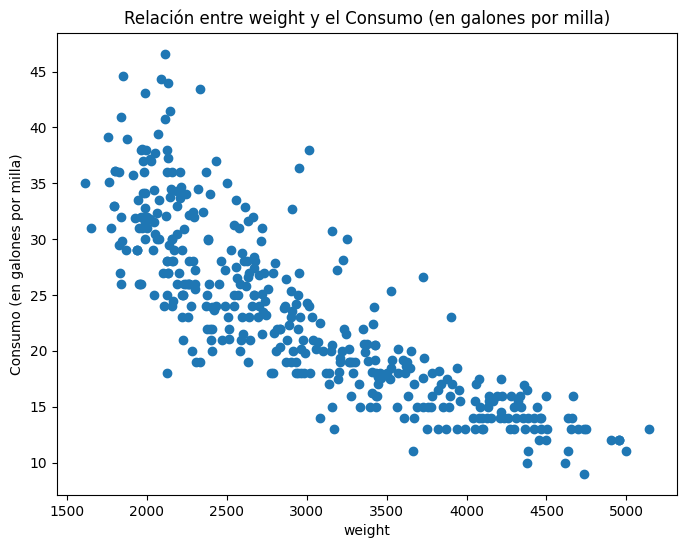

In [7]:
visualiza(X, y, 'weight')

Aunque lo ideal sería un modelo multivariante, vamos a elegir la variable `weight` y hacer una regresión lineal solo con esta variable.

### 3.2 Implementación del modelo

Lo primero, implementa una función que devuelva los valores de $\widehat{w}$ dados X e y. Si se da el caso de que el dataset tiene más features que observaciones, queremos transponerlo antes de realizar las operaciones. Lo hacemos porque, como vimos en clase, los resultados no van a ser buenos si el número de observaciones es menor.

In [8]:
import numpy as np

def pesos_ols(X, y):

    # Transposición condicional
    if X.shape[1] > X.shape[0]:
        X = X.T

    # Comprobación de dimensiones
    if X.shape[0] != y.shape[0]:
        raise ValueError("Las dimensiones de X e y no son compatibles")
        
    # Preparar la matriz X
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Añadir una columna de unos para el término de intercepto

    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    return w

In [9]:
X = np.array([[1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077], 
              [2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939]])
y = np.array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000])
pesos_ols(X, y)

array([-2.29223802e+06,  5.92536529e+01,  1.20780450e+03])

### 3.3 Prueba del modelo en los datos de consumo de coches

Ya podemos usar nuestra función `pesos` en el dataset real que hemos descargado. Para ver el ajuste, dibuja de nuevo los datos junto con la recta que has obtenido, en la misma gráfica. Tendrás que convertir los dataframes de Pandas en arrays de numpy para poder aplicar las operaciones matriciales.

TIP: Revisa las dimensiones de todos los arrays para ver que son correctas.

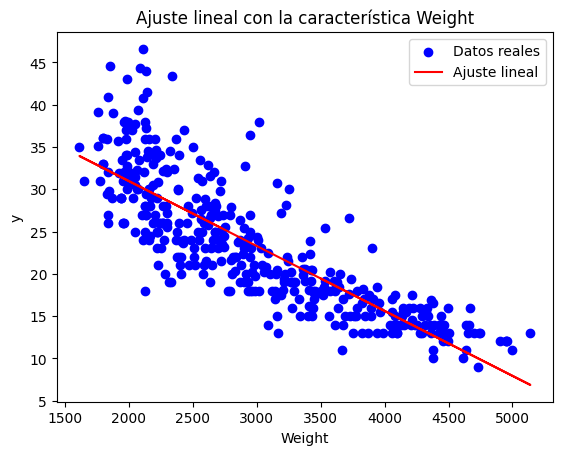

In [14]:
import matplotlib.pyplot as plt

X = auto_mpg.data.features
y = auto_mpg.data.targets

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

# Aplicar la función para calcular los pesos
w = pesos_ols(X_np, y_np)


# Crear los valores de y usando la ecuación de la recta
y_pred = w[0] + w[1] * X_np

# Dibujar los datos y la recta de ajuste
plt.scatter(X_np, y, color='blue', label='Datos reales')
plt.plot(X_np, y_pred, color='red', label='Ajuste lineal')
plt.xlabel('Weight')
plt.ylabel('y')
plt.title('Ajuste lineal con la característica Weight')
plt.legend()
plt.show()


Por último, vamos a comprar el resultado con el que nos da `scikit-learn`para ver si nuestra implementación tiene buena pinta. Podemos ver cómo funciona en la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [16]:
from sklearn.linear_model import LinearRegression

# Creamos el objeto
lr = LinearRegression()

# Le pasamos los datos en el formato correcto
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

X_lr = X[['weight']]
y_lr = y

# Entrenamos con los datos
lr.fit(X_lr,y_lr)
print("Punto de corte:", lr.intercept_)
print("Pendiente:", lr.coef_)

Punto de corte: [46.31736442]
Pendiente: [[-0.00767661]]


**TODO**: Analiza el resultado obtenido y compáralo con el de sklearn

In [21]:
Comparando estos resultados con el gráfico, podemos observar que la línea de ajuste tiene una pendiente negativa, lo que coincide con el valor de la pendiente calculada con sklearn. La pendiente negativa indica que hay una relación inversa entre el peso y la variable y, a medida que el peso aumenta, el valor de y disminuye. Además, la línea de ajuste parece pasar cerca de la parte superior del grupo de puntos cuando el peso es bajo, lo que sugiere que el punto de corte es positivo y razonablemente alto, lo cual es consistente con el punto de corte de aproximadamente 46.32 calculado por sklearn.

SyntaxError: invalid syntax (739969181.py, line 1)

### 4.0 Compara el método de mínimos cuadrados y el descenso del gradiente para obtener los coeficientes de una regresión lineal



El Método de Mínimos Cuadrados es más eficiente con conjuntos de datos de tamaño pequeño a mediano, ofreciendo una solución exacta y siendo más sencillo de implementar para regresiones lineales básicas. Sin embargo, puede ser computacionalmente demandante con conjuntos de datos grandes debido a la necesidad de inversión de matrices grandes. Por otro lado, el Método del Descenso del Gradiente es más adecuado para conjuntos de datos de gran tamaño y ofrece mayor flexibilidad, siendo útil en modelos más complejos donde los mínimos cuadrados no son aplicables. Aunque este método se aproxima a la solución a través de iteraciones y requiere una cuidadosa selección de la tasa de aprendizaje, su escalabilidad lo hace preferible en situaciones con grandes volúmenes de datos o cuando no existe una solución analítica cerrada.

### 4.1 Implementar el descenso del gradiente

Completa las siguientes funciones para implementar el descenso del gradiente con la función objetivo de la regresión lineal. La función necesitará:

- La entrada X y salida y de la regresión
- Un punto inicial desde el que empezar a iterar
- El número de iteraciones 
- El learning rate

La función nos devolverá un array con las w resultantes de las iteraciones y otro con el valor de la función en cada paso del algoritmo, a la que también se conoce como *loss function*.

In [17]:
import numpy as np

def gradient_descent(X, y, w0, n_iter, eta): 
       # Define la función que calcule n_iter iteraciones del descenso del gradiente
    # Inicializamos variables
    loss_iter = [np.inf]
    w_iter = [w0]
    w = w0

# Añade la columna de 1s
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Añadir columna de 1s a X

    for i in range(n_iter):
        # Calcular la predicción con los pesos actuales
        predictions = X_b.dot(w)
        
        # Calcular el error (diferencia entre las predicciones y los valores reales)
        error = predictions - y
        
        # Calcular la función de pérdida (Mean Squared Error)
        loss = np.mean(error**2) / 2
        
        # Calcular el gradiente
        gradient = X_b.T.dot(error) / len(X_b)
        
        # Actualizar los pesos
        w = w - eta * gradient
        
        # Añadir el error y los pesos a las listas para cada iteración
        loss_iter.append(loss)
        w_iter.append(w)

    # Devuelve los resultados
    return np.array(w_iter), np.array(loss_iter)



eta = 0.01 
iteraciones = 2000 

np.random.seed(123)
w0 = np.random.rand(2).reshape((2,1))

y = np.array([208500, 181500, 223500, 140000, 250000]).reshape((5,1))
X = np.array( [[  0.37020659],
               [  -0.48234664],
               [  0.51483616],
               [  0.38352774],
               [  1.29888065]])

weights, loss = gradient_descent(X, y, w0, iteraciones, eta)

print(weights[-1])

[[183695.36963666]
 [ 40682.97678324]]


### 4.2 Aplicar al dataset de consumo de combustible

Leemos de nuevo los datos y aplicamos la función que acabamos de programar.

In [18]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
# convert to numpy
X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

print(X_np.shape)
print(y_np.shape)

(398, 1)
(398, 1)


Para ayudar al algoritmo, vamos a escalar la variable X, restando la media y dividiendo entre la desviación estándar. Después aplicamos la función anterior y dibujamos.

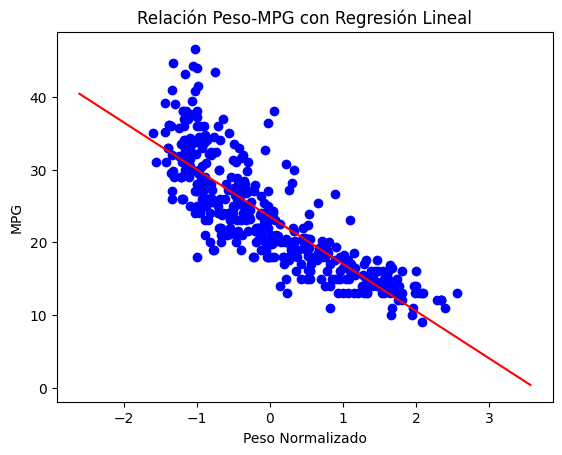

In [19]:
# TODO Aplica el modelo y dibuja la recta junto con los datos

X = auto_mpg.data.features
y = auto_mpg.data.targets

# Escalamos la variable x 

X_np = X['weight'].to_numpy().reshape((X.shape[0], 1))
y_np = y.to_numpy()

X_gd=(X_np - X_np.mean()) / X_np.std()
y_gd = y_np

# Punto inicial y learning rate
np.random.seed(123)
w0 = np.random.rand(2).reshape((2, 1))
eta = 0.01
iteraciones = 2000

# Aplicamos el algoritmo
weights, loss = gradient_descent(X_gd, y_gd, w0, iteraciones, eta)

# Límites de los ejes
x_max = np.max(X_gd) + 1
x_min = np.min(X_gd) -1


# Dibuja la gráfica

x_line = np.linspace(x_min, x_max, 100).reshape(100, 1)
y_line = np.c_[np.ones((100, 1)), x_line].dot(weights[-1])

plt.scatter(X_gd, y_gd, color='blue')
plt.plot(x_line, y_line, color='red')
plt.xlabel('Peso Normalizado')
plt.ylabel('MPG')
plt.title('Relación Peso-MPG con Regresión Lineal')
plt.show()
